# Notebook 2: Acquiring Sequences of Images Demo


In [1]:
import sys,os
sys.path.append('source')

## Example 2.1: Using the xyLooseGrid

In the first notebook AcquisitionPluginLibrary.xySequence was used to image a list of positions. In this example we extent to using a new function xyLooseGrid, which will take an x-Range and y-Range of positons and image a grid of points over the xy Range.

**xyLooseGrid**(xRange,yRange,xyOrigin):
* **xRange**: a list of (int/float) positions
* **yRange**: a list of (int/float) positions
* **xyOrigin**: an optional origin arguement. Defaults to [0,0] if none is provided


/Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/docstring_inheritance/docstring_inheritors/bases/inheritor.py:329: DocstringInheritanceWarning: File /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/pycromanager/acquisitions.py:698: in XYTiledAcquisition.__init__: section Parameters: the docstring for the argument 'tile_overlap' is missing.
  self._warn(
/Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/docstring_inheritance/docstring_inheritors/bases/inheritor.py:329: DocstringInheritanceWarning: File /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/pycromanager/acquisitions.py:698: in XYTiledAcquisition.__init__: section Parameters: the docstr

Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xyLooseGrid_1/
Image has size (9, 512, 512)
[1, 2] range(0, 2)
Slicing to last two dimensions


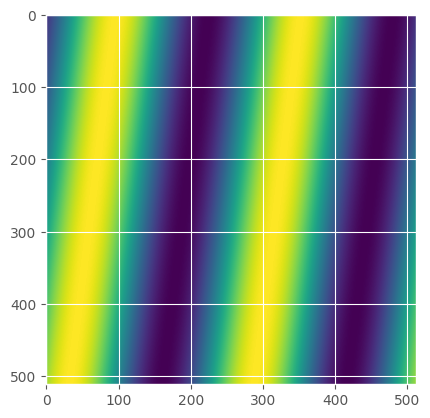

In [2]:
from source.apd import *
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
xRange=[0,10,20]
yRange=[-10,0,10]
xyOrigin=[0,0]
acquisition = lib.xyLooseGrid(xRange,yRange,xyOrigin)
dataset=apdSystem.acquire(acquisition)

print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 2.2: xyzSequence

xyzSequence uses (x,y,z) triplets instead of (x,y) pairs for its imaging sequence. This type of acquisition will image each item in the list of (x,y,z) positions. Z-Range arguements are not possible for this type of acquisition.

**xyzPositions** : a list of (x,y,z) triplets



Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xyzSequence_2/
Image has size (2, 512, 512)
[1, 2] range(0, 2)
Slicing to last two dimensions


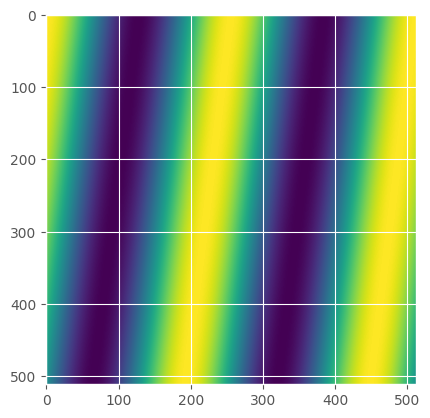

In [5]:
from source.apd import *
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
xyzPositions=[[0,0,0],[1,2,3]]
acquisition = lib.xyzSequence(xyzPositions)
dataset=apdSystem.acquire(acquisition)

print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 2.3: Using the position calibrator

Many image acqusitions are done using using stage positions as the (x,y,z) space to move in, but occasionally pixels space (or some other space) is also useful.

Passing the **calibration** arguement uses a calibration to map xy stage positions to pixel positions for convenience.

**calibrationStageToPixel** : a MatrixCalibation that performs position mapping from stage space to pixel space.

 Here is an example.

In [7]:
#This cell does not yet appear to be functional.
from source.apd import *
from source.calibration import MatrixCalibration
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
xyzPositions=[[0,0,0],[1,2,3]]
calibrationPixelToStage=MatrixCalibration(matrix=[[512,0],[0,512]],zero=[0,0])
acquisition = lib.xyzSequence(xyzPositions,calibration=calibrationPixelToStage)
dataset=apdSystem.acquire(acquisition)

print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

TypeError: AcquisitionPluginLibrary.xyzSequence() got an unexpected keyword argument 'calibration'

Calibrations used with Acquisition plugin libraries should convert an arbitrary (x,y) position to (x,y) stage position. Most calibrations are measured physically and require some system measurement to determine correctly.